In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
dataset=pd.read_csv('/content/gdrive/MyDrive/CVPR/Assignment2_dataset.csv')
print(dataset.head(10))

   Me  Opponant  Point
0   9         5      3
1   7         1      3
2   9        10      0
3   6         5      3
4   4         4      1
5   2         8      0
6   5         7      0
7   1         1      1
8   2         8      0
9   4        10      0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
X

array([[ 9,  5],
       [ 7,  1],
       [ 9, 10],
       [ 6,  5],
       [ 4,  4],
       [ 2,  8],
       [ 5,  7],
       [ 1,  1],
       [ 2,  8],
       [ 4, 10],
       [ 3, 10],
       [ 5,  4],
       [ 5,  6],
       [ 9,  9],
       [ 2,  8],
       [ 5, 10],
       [ 4,  5],
       [ 5, 10],
       [ 2,  9],
       [10,  7],
       [ 1,  9],
       [ 8,  2],
       [ 9,  1],
       [ 4,  5],
       [10,  5],
       [ 6,  6],
       [ 6,  5],
       [ 7,  2],
       [10,  2],
       [10,  4],
       [ 8,  2],
       [ 3,  6],
       [ 5,  2],
       [ 2,  1],
       [ 3,  5],
       [ 7,  9],
       [ 4,  9],
       [ 9,  5],
       [ 7,  6],
       [ 8,  5],
       [ 2,  3],
       [ 8,  7],
       [ 5,  2],
       [ 9,  3],
       [ 9, 10],
       [ 3,  8],
       [ 1,  8],
       [ 8,  6],
       [ 2,  4],
       [ 9,  6],
       [10,  3],
       [10,  6],
       [ 4, 10],
       [10,  5],
       [ 5,  3],
       [ 1, 10],
       [10,  5],
       [ 4,  7],
       [ 7,  5

In [6]:
y

array([3, 3, 0, 3, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 1, 1, 0, 1,
       3, 0, 0, 3, 0, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 0,
       0, 1, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3])

In [7]:
# Neural Network
class NeuralNetwork:
    def __init__(self):
        self.W_H1 = np.random.randn(input_size, hidden_size1)
        self.W_H2 = np.random.randn(hidden_size1, hidden_size2)
        self.W_H3 = np.random.randn(hidden_size2, hidden_size3)
        self.W_OH = np.random.randn(hidden_size3, output_size)
        self.learning_rate = learning_rate

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedforward(self, X):
        self.hidden1_output = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.W_H2))
        self.hidden3_output = self.sigmoid(np.dot(self.hidden2_output, self.W_H3))
        output_input = np.dot(self.hidden3_output, self.W_OH)
        output = self.softmax(output_input)
        return output

    def backpropagation(self, X, Y, output):
        output_error = Y - output
        output_delta = output_error

        hidden3_error = np.dot(output_delta, self.W_OH.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, derivative=True)

        hidden2_error = np.dot(hidden3_delta, self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, derivative=True)

        hidden1_error = np.dot(hidden2_delta, self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, derivative=True)

        #update weight
        self.W_OH += np.dot(self.hidden3_output.T, output_delta) * self.learning_rate
        self.W_H3 += np.dot(self.hidden2_output.T, hidden3_delta) * self.learning_rate
        self.W_H2 += np.dot(self.hidden1_output.T, hidden2_delta) * self.learning_rate
        self.W_H1 += np.dot(X.T, hidden1_delta) * self.learning_rate

    def train(self, X, Y, epochs=10000):
        errors = []
        for _ in range(epochs):
            output = self.feedforward(X)
            self.backpropagation(X, Y, output)
            error = np.mean(np.square(Y - output))
            errors.append(error)
        return errors
unique_labels = np.unique(y)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}
Y = np.array([label_to_index[label] for label in y])
Y_one_hot = np.eye(len(unique_labels))[Y]

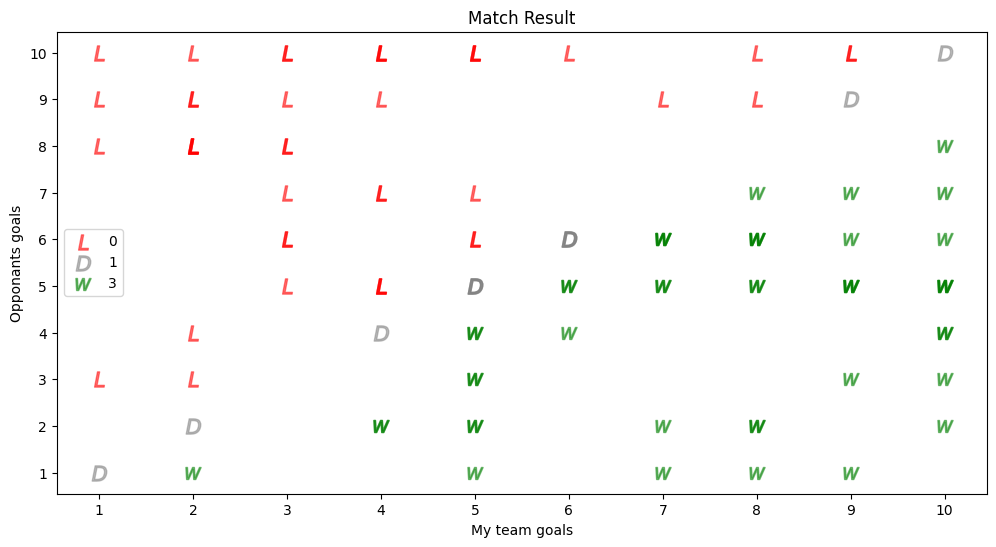

In [11]:
# Visualization
#L=Lose W=win D=Draw
markers = ['$L$', '$D$', '$W$']
colors = ['red', 'gray', 'green']
plt.figure(figsize=(12, 6))
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))
for label, marker, color in zip(unique_labels, markers, colors):
    plt.scatter(
        X[Y == label_to_index[label], 0],
        X[Y == label_to_index[label], 1],
        label=label,
        marker=marker,
        s=120,
        color=color,
        alpha=0.5
    )
plt.title('Match Result')
plt.xlabel('My team goals')
plt.ylabel('Opponants goals')
plt.legend()
plt.show()

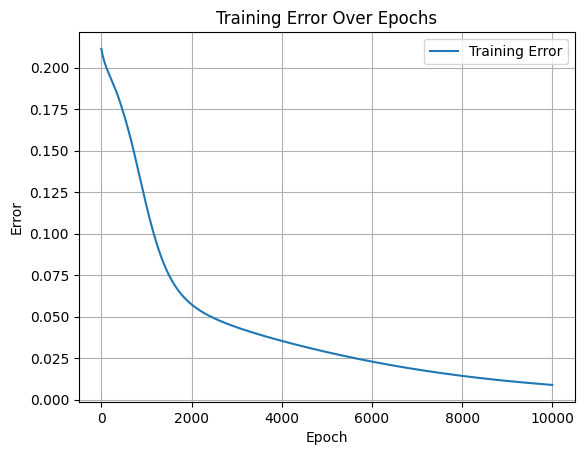

In [12]:
#Split Train and test
np.random.seed(42)
# Shuffle the dataset
indices = np.random.permutation(len(X))  # Shuffle
split_index = int(0.8 * len(X))  # 80% for train, 20% for test

train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train, X_test = X[train_indices], X[test_indices]
Y_train, Y_test = Y_one_hot[train_indices], Y_one_hot[test_indices]

# input ,hidden layer ,output ,learning rate
input_size = 2
hidden_size1 = 6
hidden_size2 = 5
hidden_size3 = 6
output_size = 3
learning_rate = 0.0002

# Initialize and train the neural network
NN = NeuralNetwork()

# Train
errors = NN.train(X_train, Y_train)

# predictions
Y_pred = NN.feedforward(X_test)
predictions = np.argmax(Y_pred, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Plot
plt.plot(range(len(errors)), errors, label='Training Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error Over Epochs')
plt.legend()
plt.grid(True)
plt.show()